In [22]:
int colors[] = {33, 43, 23, 54,66};
vector < const char *>  ang_name = {"40deg", "40deg-a","40deg-b", "40deg-c", "40deg-d"};
double measurement[] ={1.,2.,3.,4.,5.};


In [23]:

TMultiGraph *pull_graph(TGraphErrors *graph, int mstyle ){
    float sumy =0;
    float erry= 0; 
    TMultiGraph *mgraph = new TMultiGraph();
    for(int i =0; i < graph->GetN(); i++){
        sumy += graph->GetY()[i];

        erry += graph->GetErrorX(i)*graph->GetErrorX(i); 
    
    }

    float avgy = sumy/graph->GetN();
    erry = TMath::Sqrt(erry)/graph->GetN();
    
    for(int i =0; i < graph->GetN(); i++){
        TGraph * pull_gr = new TGraph();
        pull_gr->SetName(ang_name[i]);
        float pull = (graph->GetY()[i]-avgy)/erry;
        //pull_gr->SetPoint(0,Sen_A1->GetX()[i], pull);pull_gr->SetMarkerStyle(33);
        pull_gr->SetPoint(0,i, pull);
        
        pull_gr->SetMarkerSize(5);

        pull_gr->SetMarkerColor(colors[i]);
        pull_gr->SetMarkerStyle(mstyle);

        
        mgraph->Add(pull_gr);
    
    
}
    
   return mgraph;
}

In [24]:
void plot_pull(TGraphErrors*graph ,int mstyle)
{
    auto Gr = pull_graph(graph,mstyle);
    TCanvas * canvas = new TCanvas("canvas","",1200,1200);
    canvas->SetLeftMargin(0.2);
    Gr->Draw("AP");
    TAxis *xAxis = Gr->GetXaxis();
    for (int i=0;i< graph->GetN(); i++){
      xAxis->SetBinLabel(xAxis->FindFixBin(i),ang_name[i]);
    }

    Gr->GetYaxis()->SetTitle("PULL");
   // Gr->SetTitle(graph->GetName());

    TLegend *legend1 = new TLegend(0.7, 0.7, 0.8, 0.8);
    legend1->AddEntry(Gr, graph->GetName(), "P");
    legend1->Draw();
    canvas->Draw();
    //canvas->SaveAs("average_error_A1.png");    
    
}

In [25]:
file = TFile::Open("outfile_2.root");


TGraphErrors * Sen_A1 = (TGraphErrors*)Sensor_A1->Clone("Sensor_A1");
TGraphErrors * Sen_A2 = (TGraphErrors*)Sensor_A2->Clone("Sensor_A2");
TGraphErrors * Sen_A3 = (TGraphErrors*)Sensor_A3->Clone("Sensor_A3");
TGraphErrors * Sen_A4 = (TGraphErrors*)Sensor_A4->Clone("Sensor_A4");


Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present


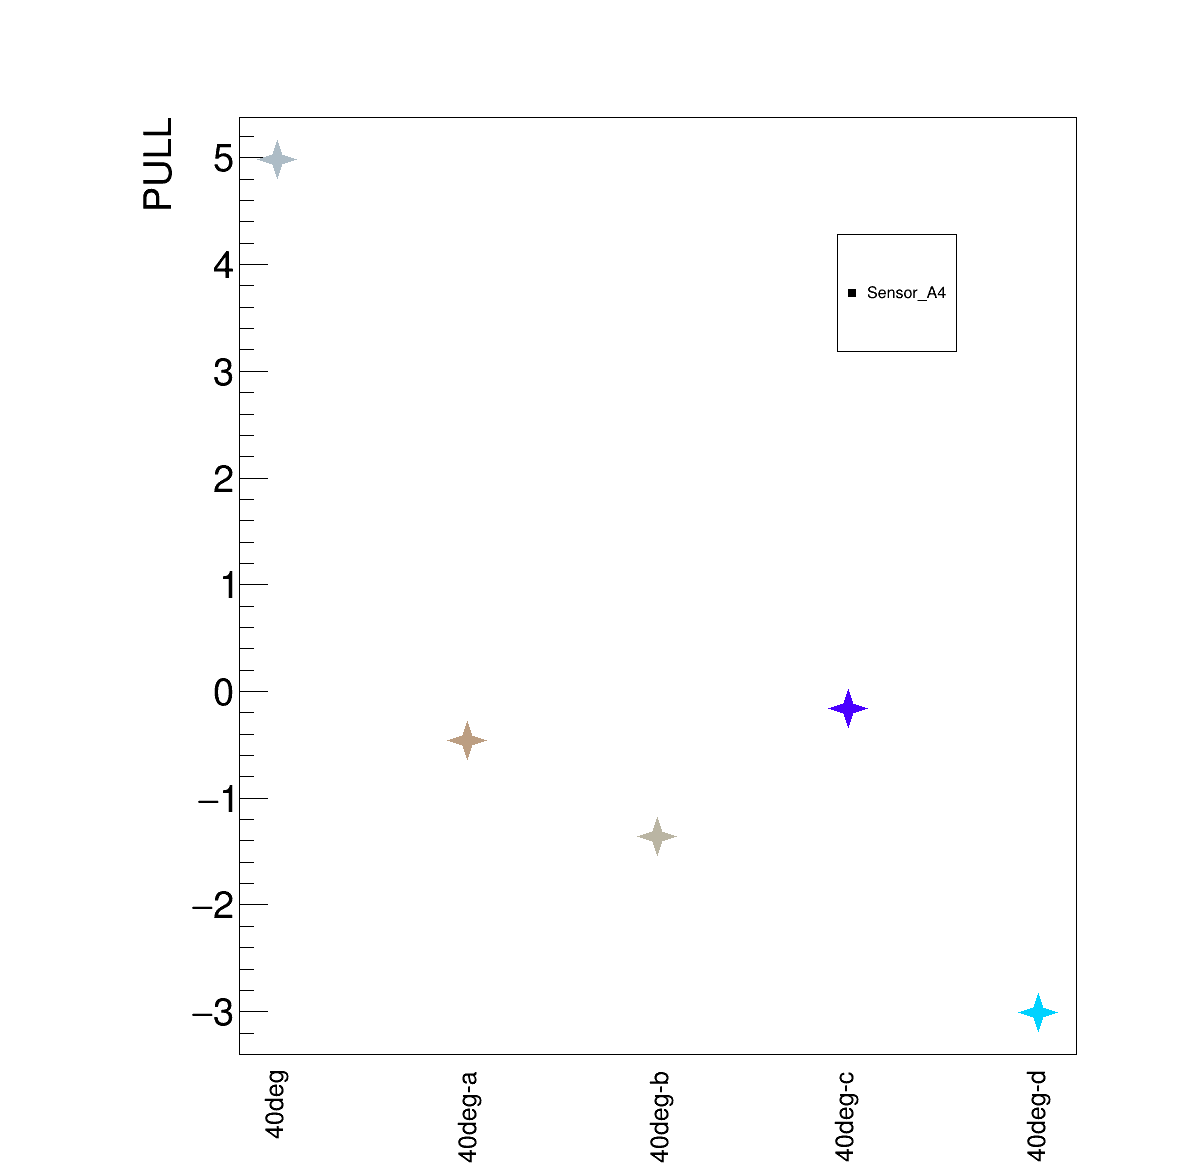

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [26]:
plot_pull(Sen_A4,43);
//plot_pull(Sen_A4,47);


In [2]:
auto A1_Gr = pull_graph(Sen_A1);


TCanvas * canvas = new TCanvas("canvas","",1200,1200);
canvas->SetLeftMargin(0.2);

A1_Gr->Draw("AP");
TAxis *xAxis = A1_Gr->GetXaxis();

for (int i=0;i< A1_Gr->GetN(); i++){
    
     xAxis->SetBinLabel(xAxis->FindFixBin(i),ang_name[i]);
}

A1_Gr->GetYaxis()->SetTitle("PULL");


canvas->Draw();
canvas->SaveAs("average_error_A1.png");

input_line_52:2:2: error: Syntax error
 auto A1_Gr = pull_graph(Sen_A1);
 ^
FunctionDecl 0x7fa9757892c8 <input_line_52:1:1, line:22:1> line:1:6 __cling_Un1Qu321 'void (void *)'
|-ParmVarDecl 0x7fa975789210 <col:23, col:29> col:29 vpClingValue 'void *'
|-CompoundStmt 0x7fa9759608f8 <col:43, line:22:1>
| |-DeclStmt 0x7fa975789778 <line:2:2, col:33>
| | `-VarDecl 0x7fa9757893d0 <col:2, col:32> col:7 used A1_Gr 'auto' cinit
| |   `-CallExpr 0x7fa975789750 <col:15, col:32> '<dependent type>'
| |     |-DeclRefExpr 0x7fa975789600 <col:15> '<dependent type>' lvalue Var 0x7fa975789538 'pull_graph' '<dependent type>'
| |     `-DeclRefExpr 0x7fa975789710 <col:26> '<dependent type>' lvalue Var 0x7fa975789648 'Sen_A1' '<dependent type>'
| |-DeclStmt 0x7fa975932c28 <line:5:1, col:54>
| | `-VarDecl 0x7fa975789868 <col:1, col:53> col:11 used canvas 'TCanvas *' cinit
| |   `-CXXNewExpr 0x7fa975932bc8 <col:20, col:53> 'TCanvas *' CXXMethod 0x6d260a0 'operator new' 'void *(size_t)'
| |     `-CXXConstruct

In [54]:
float sumy =0;
float erry= 0; 
float sumsq = 0;

for(int i =0; i < Sen_A1->GetN(); i++){
     //cout<<"X values \n "<< Sen_A1->GetX()[i]<<" +-   "<<  Sen_A1->GetErrorX(i)<< " \n\n Y values \n" <<  Sen_A1->GetY()[i]<<" +- "<<Sen_A1->GetErrorY(i)<<endl;
    sumy += Sen_A1->GetY()[i];
    sumsq += Sen_A1->GetY()[i] *Sen_A1->GetY()[i];
    erry += Sen_A1->GetErrorX(i)*Sen_A1->GetErrorX(i); 
   // cout<<<<"   " <<  Sen_A1->GetErrorY(i)<<endl;

    
}

float avgy = sumy/Sen_A1->GetN();
double variance = (sumsq / Sen_A1->GetN()) - avgy*avgy;
erry = TMath::Sqrt(erry)/Sen_A1->GetN();

//double std = TMath::Sqrt(variance);
//cout << erry << endl;
//cout << std << endl;

In [58]:

TMultiGraph * mgraph = new TMultiGraph();


for(int i =0; i < Sen_A1->GetN(); i++){
    TGraph * pull_gr = new TGraph();
    pull_gr->SetName(ang_name[i]);
    float pull = (Sen_A1->GetY()[i]-avgy)/erry;
    
    //pull_gr->SetPoint(0,Sen_A1->GetX()[i], pull);pull_gr->SetMarkerStyle(33);
    pull_gr->SetPoint(0,i, pull);pull_gr->SetMarkerStyle(33);
    pull_gr->SetMarkerSize(5);

    pull_gr->SetMarkerColor(colors[i]);
    pull_gr->SetMarkerStyle(43);
    
    //TAxis *xAxis = pull_gr->GetXaxis();
    //xAxis->SetBinLabel(1,ang_name[i]);
//pull_gr->SetMarkerColor(38);
    
    mgraph->Add(pull_gr);
    
    
}

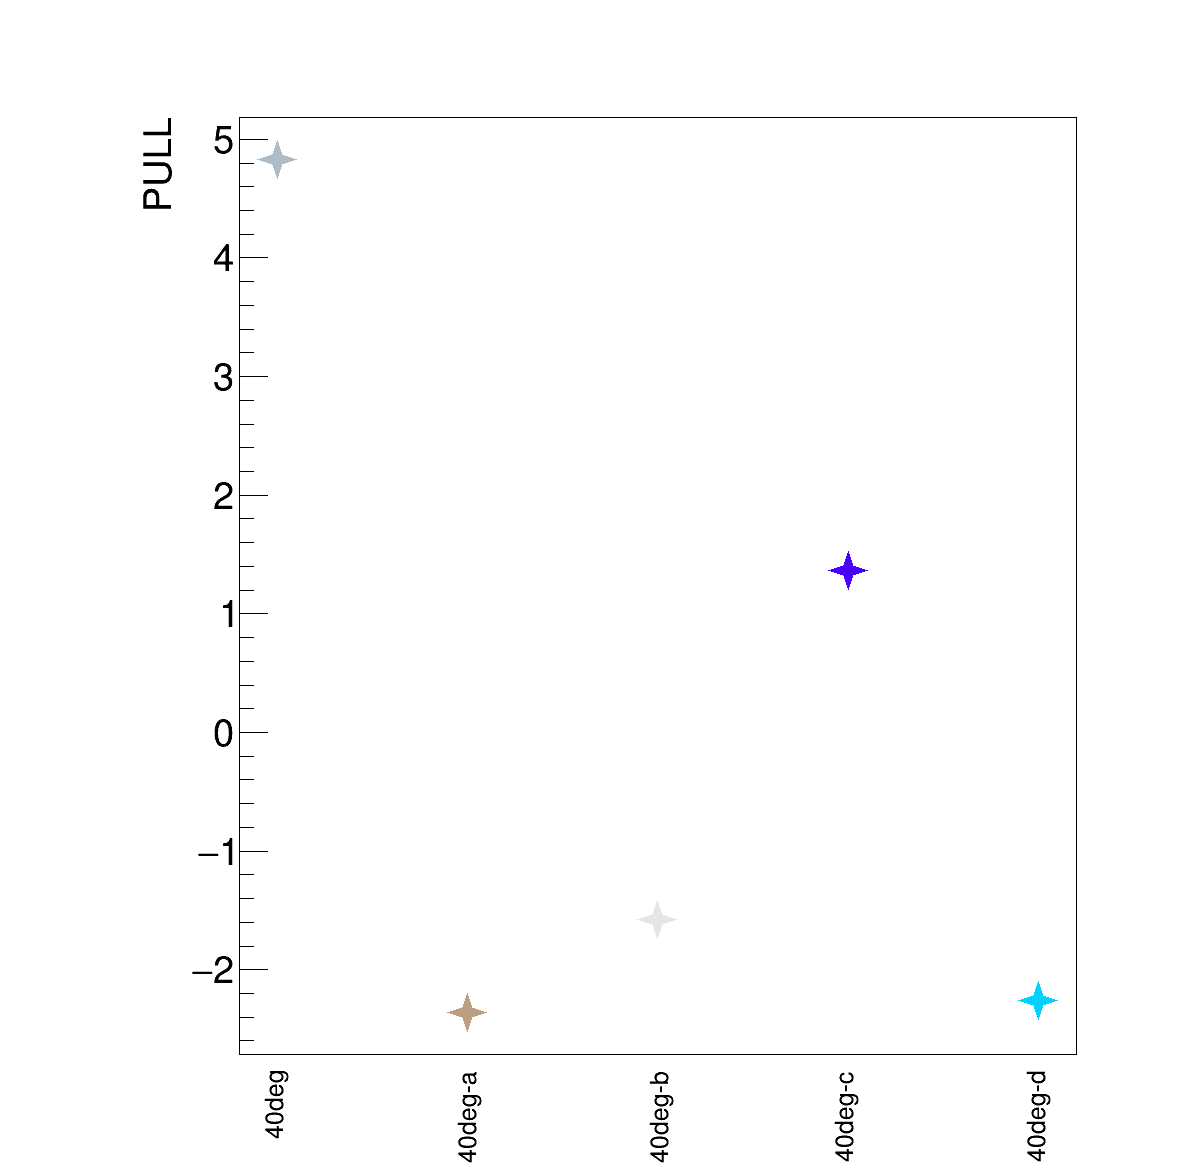

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file average_error_A1.png has been created


In [59]:
TCanvas * canvas = new TCanvas("canvas","",1200,1200);
canvas->SetLeftMargin(0.2);
//TGraph *name = newTGraph();


mgraph->Draw("AP");
TAxis *xAxis = mgraph->GetXaxis();

for (int i=0;i< Sen_A1->GetN(); i++){
    
     xAxis->SetBinLabel(xAxis->FindFixBin(i),ang_name[i]);
}
//mgraph->GetXaxis()->SetTitle("Angle");

mgraph->GetYaxis()->SetTitle("PULL");

//canvas->BuildLegend(0.6,0.6,0.8,0.8);

canvas->Draw();
canvas->SaveAs("average_error_A1.png");

In [60]:
cout << xAxis->FindFixBin(1) <<endl;

28
